# TP3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [2]:
df_netflix=pd.read_csv("netflix_titles.csv")
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


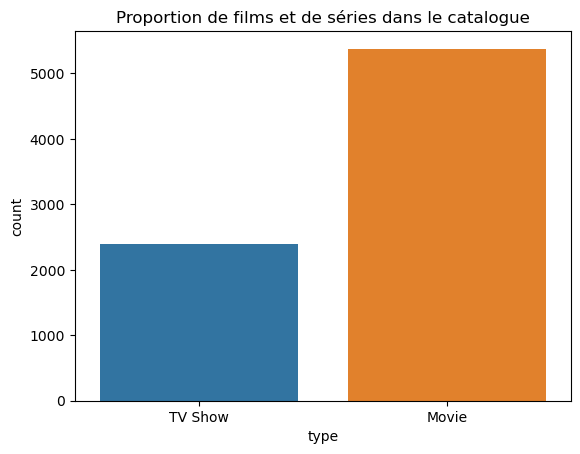

In [3]:
sns.countplot(x=df_netflix["type"])
plt.title("Proportion de films et de séries dans le catalogue");

In [4]:
df_imdb=pd.read_csv("imdb.csv")
df_imdb.head()

,primaryTitle,originalTitle,startYear,averageRating,numVotes
0,Carmencita,Carmencita,1894,5.7,1670
1,Le clown et ses chiens,Le clown et ses chiens,1892,6.1,208
2,Pauvre Pierrot,Pauvre Pierrot,1892,6.5,1394
3,Un bon bock,Un bon bock,1892,6.2,123
4,Blacksmith Scene,Blacksmith Scene,1893,6.2,2184


In [5]:
#df = pd.merge(df_netflix, df_imdb, left_on=['title', 'release_year'], right_on=['primaryTitle', 'startYear'])

#left_on= quelle colonne de gauche
#right_on= quelle colonne de droite

#ou
df=df_netflix.merge(right= df_imdb, left_on=['title', 'release_year'], right_on=['primaryTitle', 'startYear'])


df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,primaryTitle,originalTitle,startYear,averageRating,numVotes
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,7:19,7:19,2016,5.9,556
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",23:59,23:59,2011,4.6,839


In [6]:
# Méthode 1 
df['is_drama'] = df["listed_in"].str.contains("Dramas")
df[['is_drama']]

# Méthode 2
#df.loc[df["listed_in"]== "Dramas", "is_drama"]= True
#df.loc[df["listed_in"]!= "Dramas", "is_drama"]= False
#df[['is_drama']]


# Méthode 3
#df['is_drama'] = ['Dramas' in l for l in df["listed_in"]]
#df[['is_drama']]

,is_drama
0,True
1,False
2,False
3,True
4,False
...,...
5137,False
5138,True
5139,False
5140,True


In [7]:
#Pour vérifier si Dramas est toujours présent dans listed_in :

for element in df["listed_in"]:
    if element == "Dramas":
        element= True
    else:
        element= False
print("Si le résultat est",element,"c'est qu'il n'y a plus d'élément noté Dramas dans listed_in.")

Si le résultat est False c'est qu'il n'y a plus d'élément noté Dramas dans listed_in.


In [8]:
# rep 1 : méthode 1

df_movies = df[df["type"] == 'Movie']
df_movies.head(1)

#ou méthode 2
#df_movies = df.loc[df["type"] == 'Movie']
#df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,primaryTitle,originalTitle,startYear,averageRating,numVotes,is_drama
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,7:19,7:19,2016,5.9,556,True


In [9]:
# rep 2 méthode 1

df_movies = df_movies.assign(duree=df_movies["duration"].apply(lambda x: x[:-4]).astype(int)) 
# pour assigner une nouvelle colonne à un df à partir d'une expression

# ou méthode 2
#df_movies['duree']= df_movies["duration"].apply(lambda x: x[:-4]).astype(int)

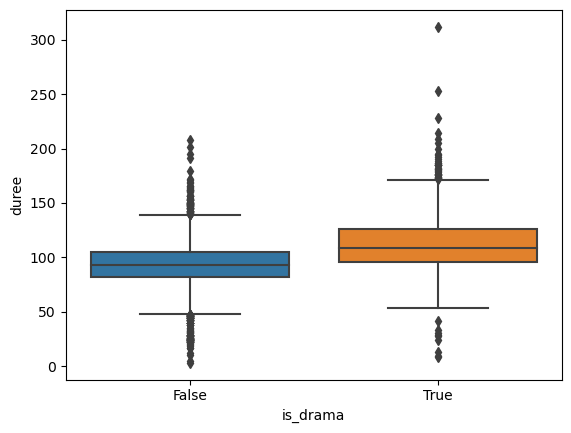

In [10]:
# Méthode 1 
sns.boxplot(x='is_drama', y='duree', data=df_movies);

# Méthode 2
#df_movies.boxplot(column="duree", by= "is_drama", figsize=(10,10));
#plt.grid(visible=None)

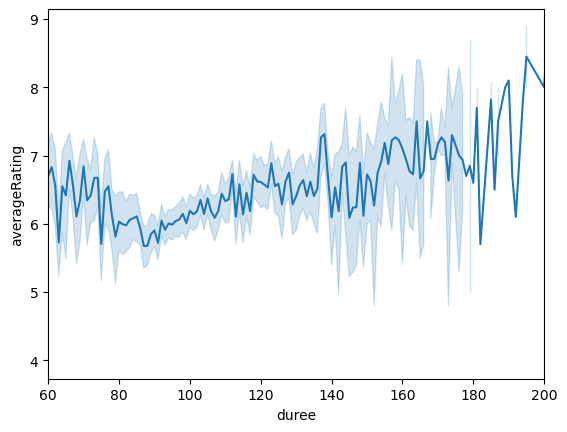

In [11]:
#Méthode 1
sns.lineplot(x=df_movies["duree"], y=df_movies["averageRating"])#tracer de ligne
plt.xlim([60, 200]);#delimite l'axe

# Méthode 2
#sns.relplot("duree", "averageRating", 
            #data= df_movies[(df_movies["duree"]>=60) & (df_movies["duree"]<=200)], 
            #kind="line", 
            #hue= df["type"]=="Movie", #definit sur quelle colonne s'appuyer pour le codage de couleur
            #ci= None);

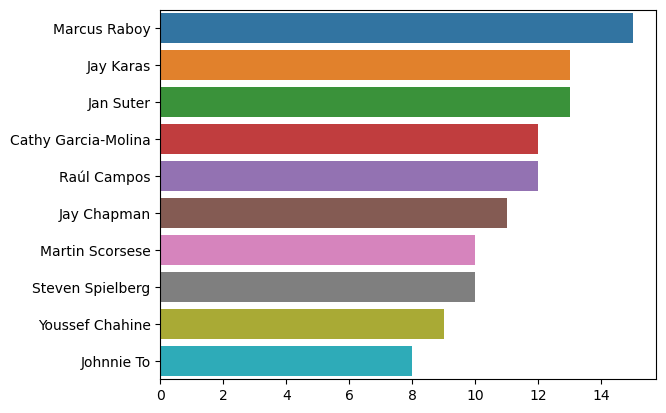

In [12]:
directors = df["director"].str.split(', ', expand=True).stack().reset_index(drop=True) # permet de retourner une série avec les noms des réalisateurs 
# directors

#.str.split(sep=, expand= True or False) = récupère une chaine de caractère séparé par un caractère
#.stack() = transforme un df en série multi-index en empilant les valeurs (non manquantes) 
#.reset_index(drop=True) = défini un nouvel index par défaut au df créé
#y stocke l'index du value_count
#x stocke la valeur
sns.barplot(y=directors.value_counts().head(10).index,
            x=directors.value_counts().head(10).values
            );

In [13]:
#rep 1

import datetime as dt
df["date_added"].unique()
#df['year_added'] = (pd.to_datetime(df["date_added"], format='%Y-%m-%d')).dt.year

array(['December 23, 2016', 'December 20, 2018', 'November 16, 2017', ...,
       'August 5, 2015', 'December 6, 2018', 'January 11, 2020'],
      dtype=object)

In [14]:
df["year_added"]= df["date_added"].apply(lambda x: x.split(",")[-1])

In [15]:
df["year_added"]

0        2016
1        2018
2        2017
3        2020
4        2020
        ...  
5137     2019
5138     2018
5139     2020
5140     2020
5141     2019
Name: year_added, Length: 5142, dtype: object

In [16]:
#rep 2 Création intermédiaire d'un dataframe

df2= df.groupby(['type','year_added']).count().show_id.reset_index()

#on créé un df de 3 colonnes en intégrant un index par défaut à la place de l'initial. 
#Si le DataFrame a un MultiIndex, cette méthode peut supprimer un ou plusieurs niveaux.

df2

,type,year_added,show_id
0,Movie,2009,2
1,Movie,2010,1
2,Movie,2011,10
3,Movie,2012,2
4,Movie,2013,5
5,Movie,2014,14
6,Movie,2015,44
7,Movie,2016,193
8,Movie,2017,651
9,Movie,2018,894


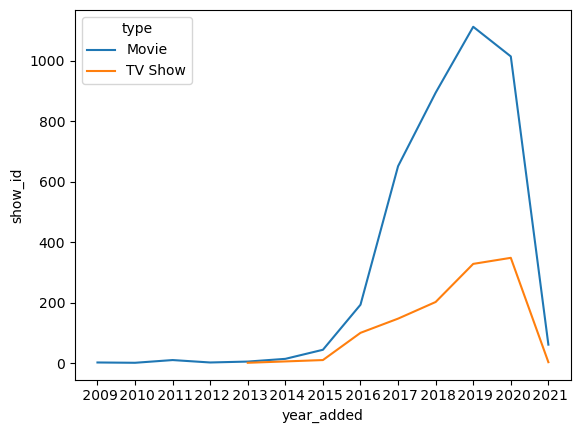

In [17]:
#rep 2 Réprésentation graphique lineaire
sns.lineplot(x='year_added', y='show_id', hue='type', data=df2);

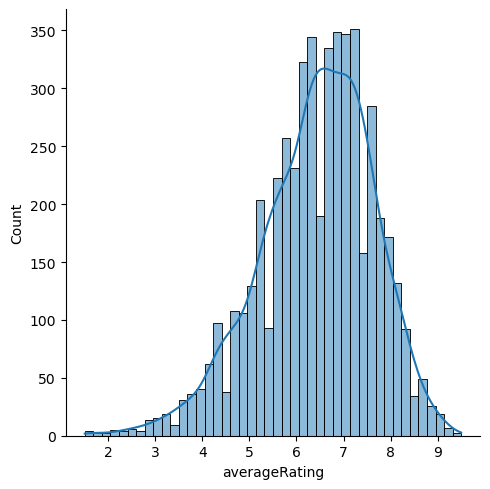

In [18]:
# Méthode 1 displot(module relational)
#permet de visualiser la distribution des données
sns.displot(df["averageRating"], kind='hist', kde=True) # kde= densité

# Méthode 2
#sns.displot(df.averageRating, kde=True);

In [19]:
# création de la série : France et TV show (série TV) triée par ordre décroissant sur le nombre de votes 
france_series = df[(df.country == 'France') & (df.type == 'TV Show')].sort_values('numVotes', ascending=False)

# création de la série : France et Movie (film) triée par ordre décroissant sur le nombre de votes
france_movies = df[(df.country == 'France') & (df.type == 'Movie')].sort_values('numVotes', ascending=False)

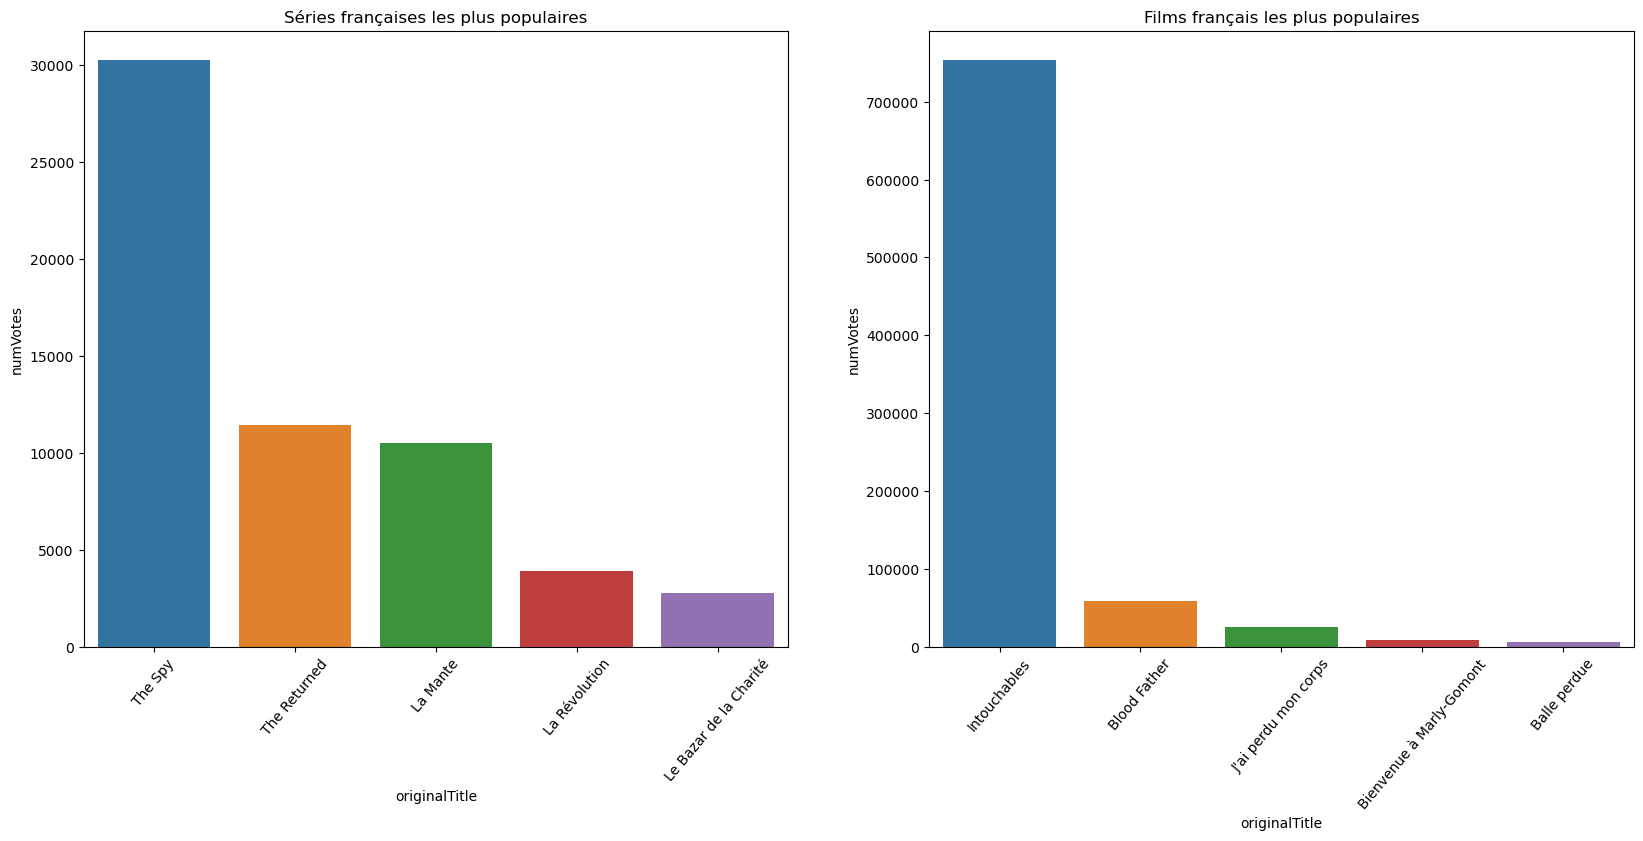

In [20]:
plt.figure(figsize=(20, 8))

plt.subplot(121) # peut aussi s'écrire plt.subplot(1,2,1) = 1=numrows, 2= numcols, 1= n° de position du graphique (min=1, max= numrows*numcols)
plt.title(label='Séries françaises les plus populaires')
sns.barplot(y=france_series["numVotes"].head(5), x=france_series["originalTitle"].head(5))
plt.xticks(rotation=50) # paramétrage de l'étiquette de l'abscisse

plt.subplot(122)
plt.title(label='Films français les plus populaires')
sns.barplot(y=france_movies["numVotes"].head(5), x=france_movies["originalTitle"].head(5))
plt.xticks(rotation=50)

plt.show();

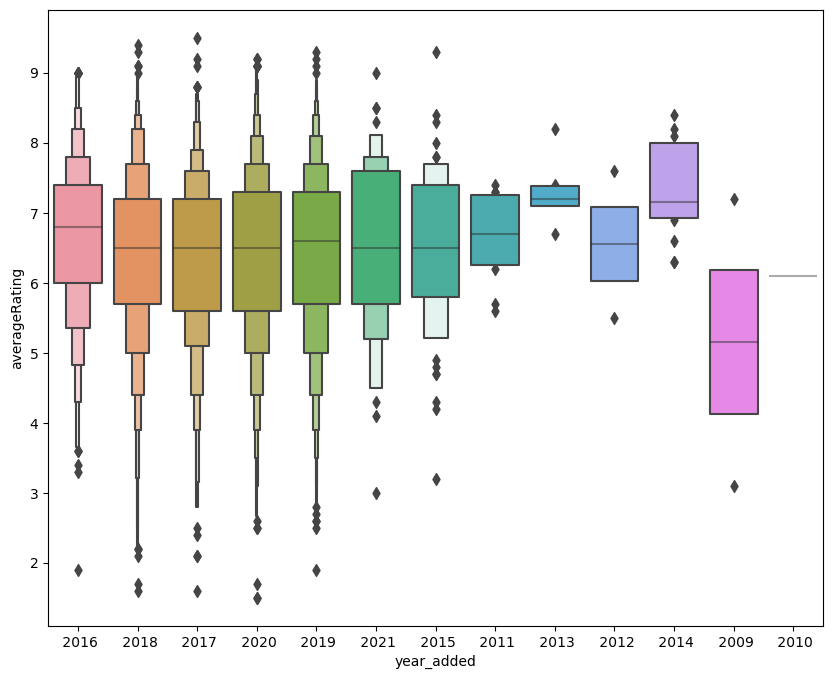

In [21]:
plt.figure(figsize=(10, 8)) # format de la figure
sns.boxenplot(x="year_added", y="averageRating", data= df);

# Pour les années 2013 et 2014, les nouveaux contenus ont été majoritairement très qualitatifs.
# En moyenne, le contenu ne décroit pas au fil du temps.
# En revanche, on obsèrve ces 5 dernières années des ajouts de contenus très mal notés,
# mais compensés par l'ajout au contraire de contenus très appréciés.

In [23]:
# Extraction des acteurs/actrices des Etats-Unis qui ont une note moyenne sup à 7, 
# en faisant ressortir l'information concernant les acteurs à récupérer sous forme de chaine de caractère

df_cast = df[(df["country"] == 'United States') & (df["averageRating"] > 7)]['cast'].str.split(', ', expand=True).stack().reset_index(drop=True) # permet de retourner une série avec les noms des acteurs/actrices 

#.str.split(sep=, expand= True or False) = récupère une chaine de caractère séparé par un caractère
#.stack() = transforme un df en série multi-index en empilant les valeurs (non manquantes) 
#.reset_index(drop=True) = défini un nouvel index par défaut au df créé

df_cast.head(10)

0            Elijah Wood
1         John C. Reilly
2      Jennifer Connelly
3    Christopher Plummer
4         Crispin Glover
5          Martin Landau
6        Fred Tatasciore
7       Alan Oppenheimer
8               Tom Kane
9         Annette Bening
dtype: object

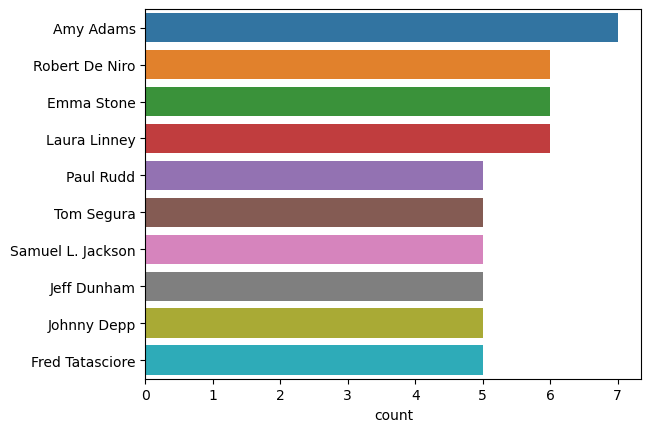

In [24]:
#sous forme de graphique en barres
sns.barplot(y=df_cast.value_counts().head(10).index, #.index = pour définir en ordonnée
            x=df_cast.value_counts().head(10))
plt.show();